

# Portfolio Management- Risk Aversion Equation 



## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Looking at Portfolio weights](#4.2.2)
        * [5.2.3. Finding the Best Eigen Portfolio](#4.2.3)
        * [5.2.4. Backtesting Eigenportfolio](#4.2.4)

<a id='0'></a>
# 1. Problem Definition

Our goal in this case study is to maximize risk-adjusted returns using dimensionality
reduction-based algorithm on a dataset of stocks to allocate capital into different asset
classes.

The dataset used for this case study is ETFs and sotcks from Chile's roboadvisors from year 2010 onwards till 2022. The dataset can be downloaded from
yahoo finance.

https://www.soyfocus.com/


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import scipy

<a id='1.2'></a>
## 2.2. Loading the Data

help(yf.Ticker)

In [2]:

#stocks_names = ["ITOT","IVV","QQQ","VTI","CXSE","IJR","0LMR.L","VPL","VWO","SUSA","CEMB","HYEM","MGV","USHY"]
stocks_names = ["ITOT","IVV","QQQ","VTI","IJR","VPL","VWO","SUSA","HYEM","MGV"]

In [3]:
dataset = pd.DataFrame()

In [4]:
stocks = []
for s in stocks_names:
    value = yf.Ticker(s).history(period = "10y").Close
    dat = pd.DataFrame({"{}".format(s): value})
    dataset = pd.concat([dataset,dat],axis = 1)

In [5]:
test = yf.Ticker("QQQ").history(start='2019-01-01', end='2019-01-06')

In [6]:
str(test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2019-01-02 00:00:00-05:00,147.110002,151.747678,147.002828,150.900040,58576700,0.0,0.0,0.0
2019-01-03 00:00:00-05:00,148.678670,149.321698,145.648586,145.970108,74820200,0.0,0.0,0.0
2019-01-04 00:00:00-05:00,148.425309,152.965565,147.840737,152.215347,74709300,0.0,0.0,0.0


In [7]:
dataset["QQQ"]

Date
2013-03-08 00:00:00-05:00     62.755749
2013-03-11 00:00:00-04:00     62.938271
2013-03-12 00:00:00-04:00     62.710125
2013-03-13 00:00:00-04:00     62.627983
2013-03-14 00:00:00-04:00     62.837879
                                ...    
2023-03-01 00:00:00-05:00    291.200012
2023-03-02 00:00:00-05:00    293.609985
2023-03-03 00:00:00-05:00    299.679993
2023-03-06 00:00:00-05:00    300.019989
2023-03-07 00:00:00-05:00    296.339996
Name: QQQ, Length: 2517, dtype: float64

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [8]:
# shape
dataset.shape

(2517, 10)

In [9]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
Date,,,,,,,,,,
2013-03-08 00:00:00-05:00,29.379126,129.773560,62.755749,67.001411,37.639019,43.990829,33.476391,28.459440,14.837094,36.647438
2013-03-11 00:00:00-04:00,29.495045,130.221985,62.938271,67.193405,37.621593,44.220879,33.325668,28.515726,14.870125,36.779686
2013-03-12 00:00:00-04:00,29.408106,129.914749,62.710125,67.076553,37.464863,43.868149,32.986530,28.398821,14.897649,36.740803
2013-03-13 00:00:00-04:00,29.474346,130.097427,62.627983,67.201744,37.669495,43.868149,32.669994,28.567677,14.914147,36.764130
2013-03-14 00:00:00-04:00,29.631649,130.828201,62.837879,67.577362,38.074467,44.013840,32.835800,28.688913,14.919657,36.981949


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

<AxesSubplot: title={'center': 'Correlation Matrix'}>

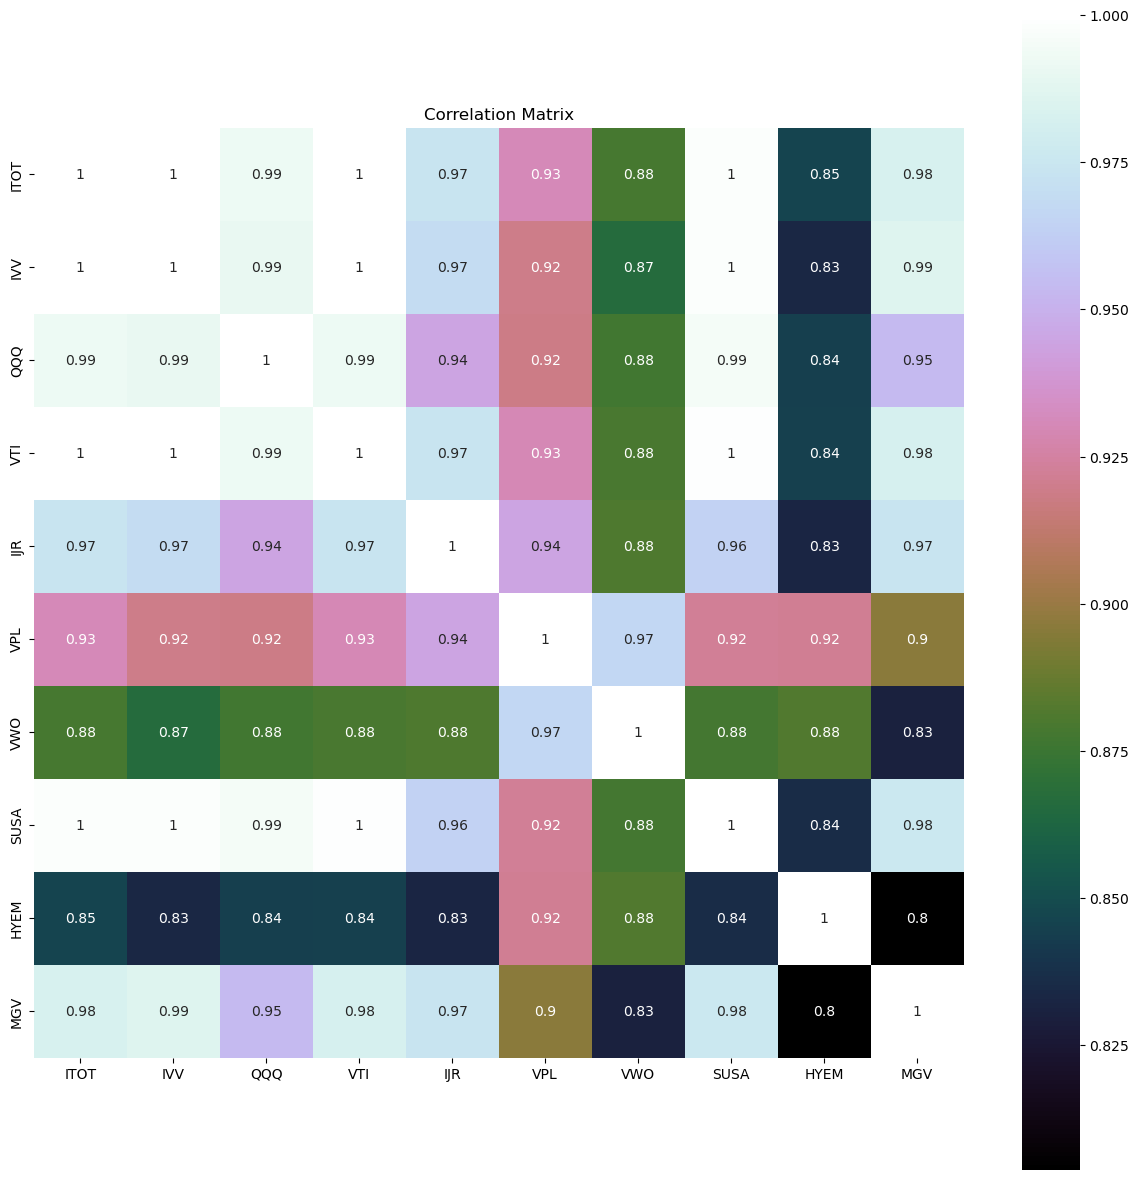

In [12]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the chart above, there is a significant positive correlation between
the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column

In [13]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Getting rid of the columns with more than 30% missing values. 

In [14]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(2517, 10)

Given that there are null values drop the rown contianing the null values.

In [15]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
Date,,,,,,,,,,
2013-03-08 00:00:00-05:00,29.379126,129.773560,62.755749,67.001411,37.639019,43.990829,33.476391,28.459440,14.837094,36.647438
2013-03-11 00:00:00-04:00,29.495045,130.221985,62.938271,67.193405,37.621593,44.220879,33.325668,28.515726,14.870125,36.779686


In [44]:
dataset.to_csv("assets.csv")


In [2]:
dataset = pd.read_csv("assets.csv")

# Analysis

In [3]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage,risk_matrix

from pypfopt import plotting
import copy

In [4]:
## Data 4 U
#percentage = int(len(dataset) * 0.7)
dataset_train = dataset[761:1715]
dataset_test = dataset[1715:]

#dataset.to_csv("assets.csv")

In [6]:
mu = mean_historical_return(dataset_train,compounding = False)
#S = CovarianceShrinkage(dataset).ledoit_wolf()
S = risk_matrix(dataset_train)#.sample_cov()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [20]:
dataset_train.iloc[100:]

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
Date,,,,,,,,,,
2016-08-08 00:00:00-04:00,44.388016,194.541122,111.074608,99.745491,55.776321,49.437866,31.221909,41.347191,16.418842,53.543468
2016-08-09 00:00:00-04:00,44.423721,194.665298,111.331703,99.834702,55.794552,49.772144,31.428782,41.360828,16.452835,53.526604
2016-08-10 00:00:00-04:00,44.289833,194.186295,111.046036,99.540337,55.480247,49.939270,31.354307,41.297173,16.473228,53.374908
2016-08-11 00:00:00-04:00,44.504055,195.082260,111.522148,100.039879,55.749001,50.298607,31.718418,41.588158,16.425638,53.627739
2016-08-12 00:00:00-04:00,44.468342,194.922592,111.598305,99.941757,55.676113,50.006130,31.594282,41.519958,16.473228,53.535038
...,...,...,...,...,...,...,...,...,...,...
2019-12-20 00:00:00-05:00,69.182068,307.139618,207.519623,155.821182,80.096878,64.424019,40.448006,64.287476,19.642242,80.594650
2019-12-23 00:00:00-05:00,69.277573,307.358765,208.067719,155.916092,80.230759,64.367615,40.520393,64.292282,19.667067,80.649765
2019-12-24 00:00:00-05:00,69.296661,307.396790,208.175797,155.950455,80.450661,64.238159,40.483742,64.301888,19.650526,80.639603


In [21]:
np.mean(dataset_train.pct_change(1))*252

/home/martin/anaconda3/envs/roboadvisor/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ITOT    0.149999
IVV     0.149731
QQQ     0.204742
VTI     0.150199
IJR     0.141136
VPL     0.100331
VWO     0.118117
SUSA    0.150424
HYEM    0.075359
MGV     0.138007
dtype: float64

In [22]:
S

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
ITOT,0.015538,0.015386,0.018843,0.015468,0.017136,0.012676,0.015055,0.015386,0.002103,0.013964
IVV,0.015386,0.015398,0.018870,0.015360,0.016391,0.012655,0.015018,0.015304,0.002106,0.013976
QQQ,0.018843,0.018870,0.027101,0.018787,0.019071,0.015527,0.019141,0.018677,0.002556,0.015596
VTI,0.015468,0.015360,0.018787,0.015465,0.017134,0.012661,0.015038,0.015350,0.002111,0.013951
IJR,0.017136,0.016391,0.019071,0.017134,0.024899,0.013886,0.016208,0.016674,0.002026,0.015203
VPL,0.012676,0.012655,0.015527,0.012661,0.013886,0.016153,0.017167,0.012531,0.002398,0.011416
VWO,0.015055,0.015018,0.019141,0.015038,0.016208,0.017167,0.027075,0.015085,0.003432,0.013326
SUSA,0.015386,0.015304,0.018677,0.015350,0.016674,0.012531,0.015085,0.016128,0.002138,0.013915
HYEM,0.002103,0.002106,0.002556,0.002111,0.002026,0.002398,0.003432,0.002138,0.002419,0.001913
MGV,0.013964,0.013976,0.015596,0.013951,0.015203,0.011416,0.013326,0.013915,0.001913,0.013736


$$
\mathcal{L} = \bar{x}^T \mu \mathbf{S} \bar{x}  - \mathbf{R}  x\\
\sum x = 1 \\
 x_{i} > 0 
$$

## Max Sharpe Ratio

Expected annual return: 9.6%
Annual volatility: 5.5%
Sharpe Ratio: 1.73


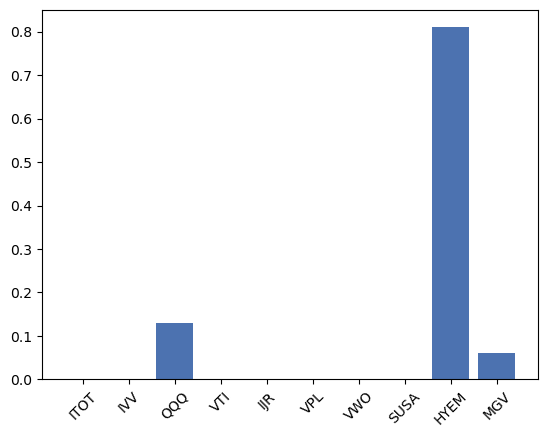

In [23]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate = 0)
ef.portfolio_performance(risk_free_rate= 0,verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])
    
plt.bar(w_k,w_v)
plt.xticks(rotation = 45);

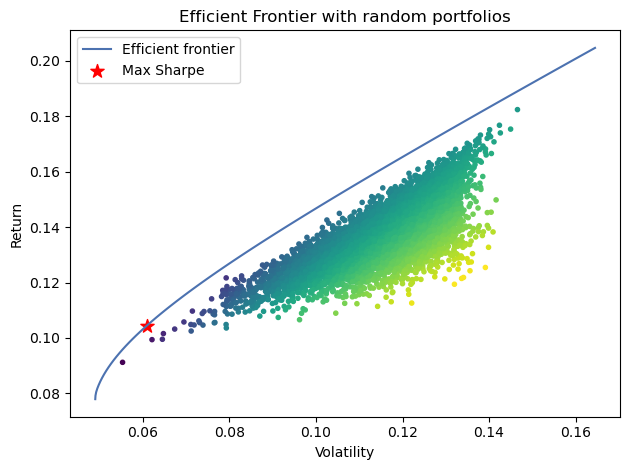

In [24]:
ef = EfficientFrontier(mu, S)

weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [33]:
print(np.sqrt(max(np.diag(S))),np.sqrt(min(np.diag(S))))

0.1646223500021627 0.0491853157751461


### Backtest

In [26]:
ret_test_SR = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

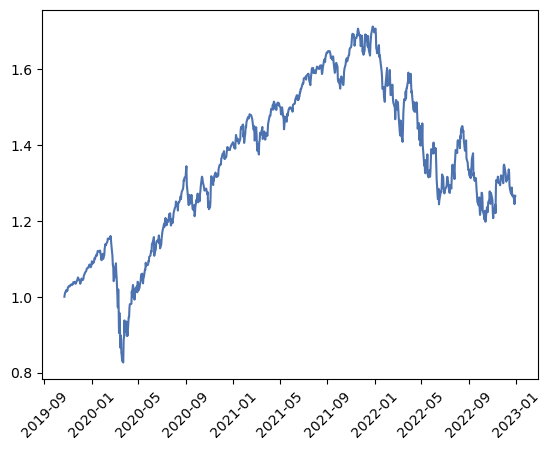

In [27]:
plt.plot(dataset_test.index,ret_test_SR/ret_test_SR[0])
plt.xticks(rotation = 45);

## Max utility given risk aversion

Expected annual return: 18.6%
Annual volatility: 17.2%
Sharpe Ratio: 0.96


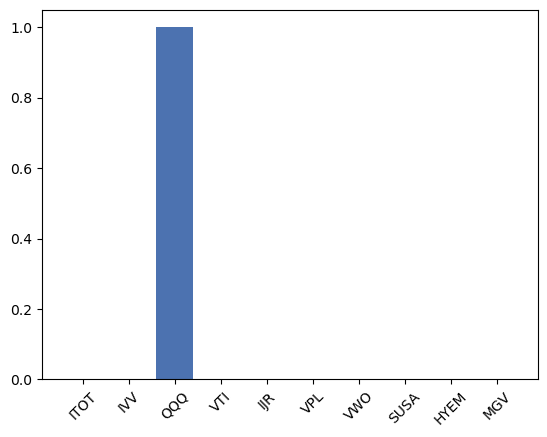

In [28]:
ef = EfficientFrontier(mu, S)
weights = ef.max_quadratic_utility(risk_aversion=0.001)
ef.portfolio_performance(verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])

plt.bar(w_k,w_v)
plt.xticks(rotation = 45);

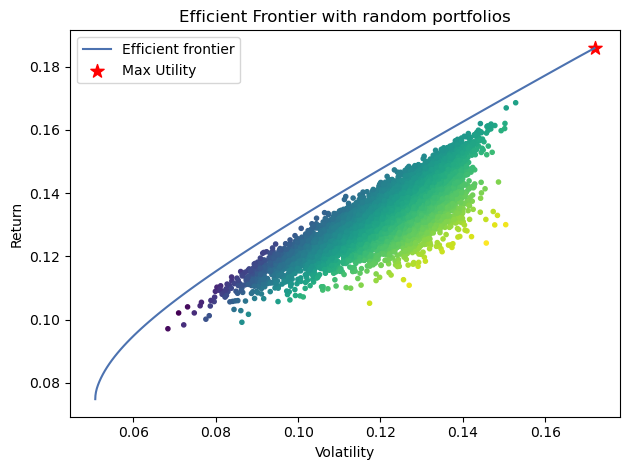

In [29]:
ef = EfficientFrontier(mu, S)

weights = ef.max_quadratic_utility(0.1)
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Utility")

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Backtest

In [30]:
ret_test_MU = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

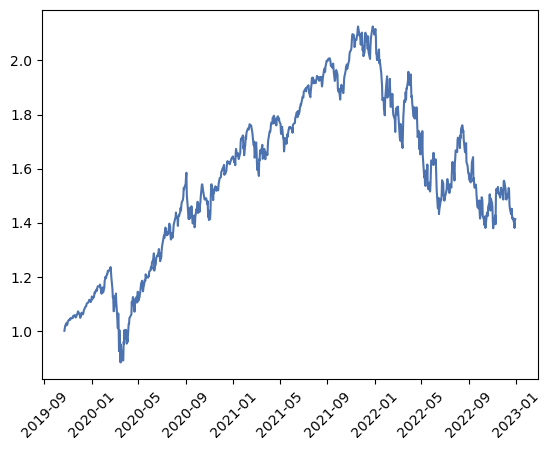

In [31]:
plt.plot(dataset_test.index,ret_test_MU/ret_test_MU[0])
plt.xticks(rotation = 45);

## Max Return given Risk

$$
\text{max} R[w]\\
w S w < \mu
$$

Expected annual return: 8.5%
Annual volatility: 5.4%
Sharpe Ratio: 1.22


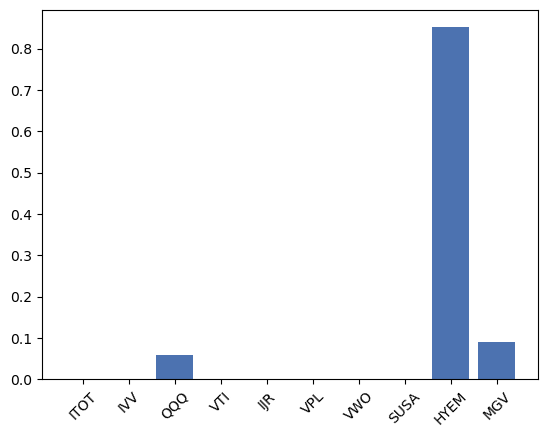

In [33]:
ef = EfficientFrontier(mu, S)
risk = np.sqrt(0.0029)

weights = ef.efficient_risk(risk)
ef.portfolio_performance(verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])
    
plt.bar(w_k,w_v)
plt.xticks(rotation = 45);

In [34]:
#Asset allocation given the Return, variance
def get_asset_allocation(riskTolerance,stock_ticker,initial_inv = 100):
    #ipdb.set_trace()
    #assets_selected = assets.loc[:,stock_ticker]
    #return_vec = np.array(assets_selected.pct_change().dropna(axis=0)).T
    mu = mean_historical_return(dataset_train,compounding = False)
    #S = CovarianceShrinkage(dataset).ledoit_wolf()
    S = risk_matrix(dataset)#.sample_cov()
    
    ef = EfficientFrontier(mu, S)
    risk = np.sqrt(0.0029)

    weights = ef.efficient_risk(risk)
    ef.portfolio_performance(verbose=True)

    
    
    #mus = 1-riskTolerance
    
    # Convert to cvxopt matrices
    #S = opt.matrix(np.cov(return_vec))
    #pbar = opt.matrix(np.mean(return_vec, axis=1))
    
    # Create constraint matrices
    #G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    #h = opt.matrix(0.0, (n ,1))
    #A = opt.matrix(1.0, (1, n))
    #b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    #portfolios = solvers.qp(mus*S, -pbar, G, h, A, b)
    #w=portfolios['x'].T
    print (weights)
    #Alloc =  pd.DataFrame(data = np.array(portfolios['x']),index = assets_selected.columns)

    # Calculate efficient frontier weights using quadratic programming
    #portfolios = solvers.qp(mus*S, -pbar, G, h, A, b)
    returns_final= np.dot(dataset.loc[:, weights.keys()], np.array(list(weights.values())))
    returns_sum = np.sum(returns_final,axis =1)
    returns_sum_pd = pd.DataFrame(returns_sum, index = assets.index )
    returns_sum_pd = returns_sum_pd - returns_sum_pd.iloc[0,:] + initial_inv   
    return Alloc,returns_sum_pd

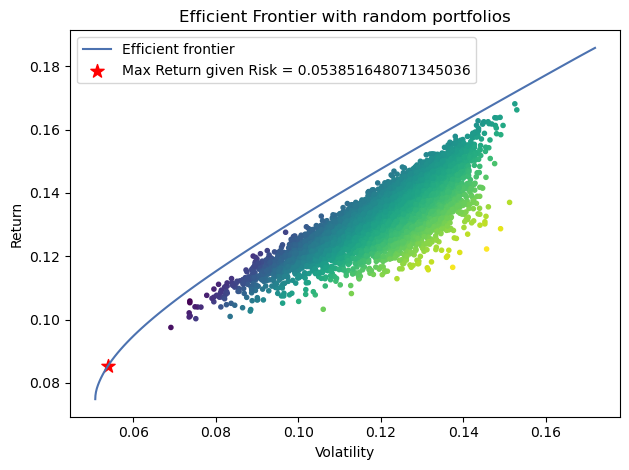

In [35]:
ef = EfficientFrontier(mu, S)

weights = ef.efficient_risk(risk)
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Return given Risk = {}".format(risk))

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Backtest

In [36]:
ret_test_MR = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

1.1774465894064308


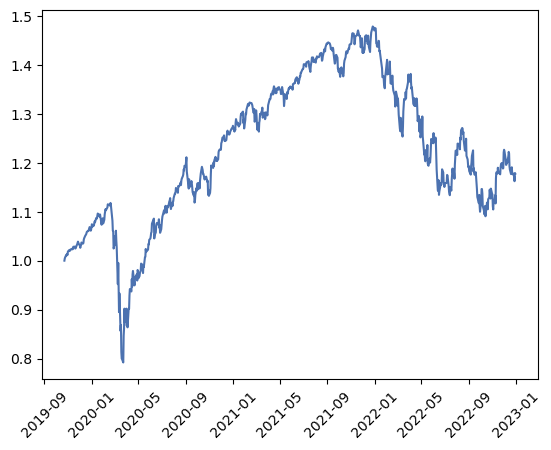

In [37]:
plt.plot(dataset_test.index,ret_test_MR/ret_test_MR[0])
plt.xticks(rotation = 45);
print(ret_test_MR[-1]/ret_test_MR[0])

## Min Volatility given Return

In [38]:
help(ef.efficient_return)

Help on method efficient_return in module pypfopt.efficient_frontier.efficient_frontier:

efficient_return(target_return, market_neutral=False) method of pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier instance
    Calculate the 'Markowitz portfolio', minimising volatility for a given target return.
    
    :param target_return: the desired return of the resulting portfolio.
    :type target_return: float
    :param market_neutral: whether the portfolio should be market neutral (weights sum to zero),
                           defaults to False. Requires negative lower weight bound.
    :type market_neutral: bool, optional
    :raises ValueError: if ``target_return`` is not a positive float
    :raises ValueError: if no portfolio can be found with return equal to ``target_return``
    :return: asset weights for the Markowitz portfolio
    :rtype: OrderedDict



Expected annual return: 12.0%
Annual volatility: 8.5%
Sharpe Ratio: 1.17


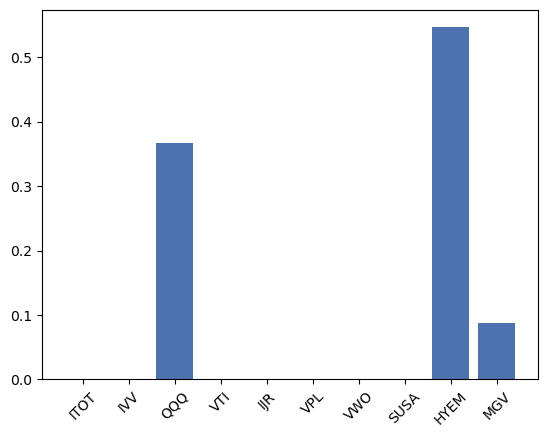

In [39]:
ef = EfficientFrontier(mu, S)
ret = 0.12
weights = ef.efficient_return(target_return =ret)
ef.portfolio_performance(verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])
    
plt.bar(w_k,w_v)
plt.xticks(rotation = 45);
                              


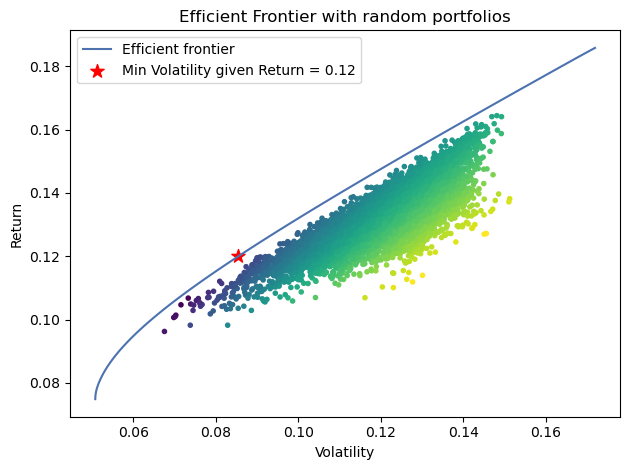

In [40]:
ef = EfficientFrontier(mu, S)

weights = ef.efficient_return(target_return =ret)
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility given Return = {}".format(ret))

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Backtest

In [41]:
ret_test_MV = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

In [42]:
dataset_test.index[-1]

Timestamp('2022-12-30 00:00:00-0500', tz='America/New_York')

1.3517854040291117


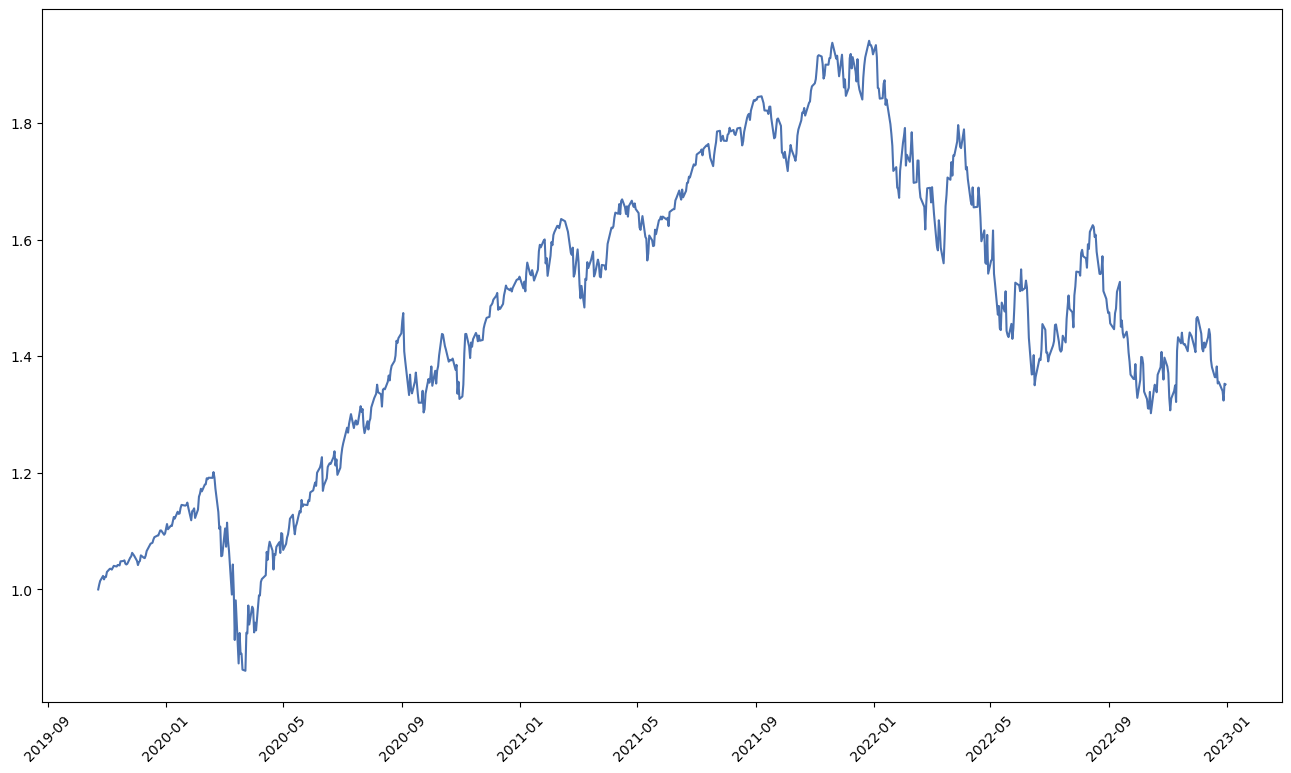

In [43]:
plt.figure(figsize = (16,9))

plt.plot(dataset_test.index,ret_test_MV/ret_test_MV[0])
plt.xticks(rotation = 45);
print(ret_test_MV[-1]/ret_test_MV[0])

# All together

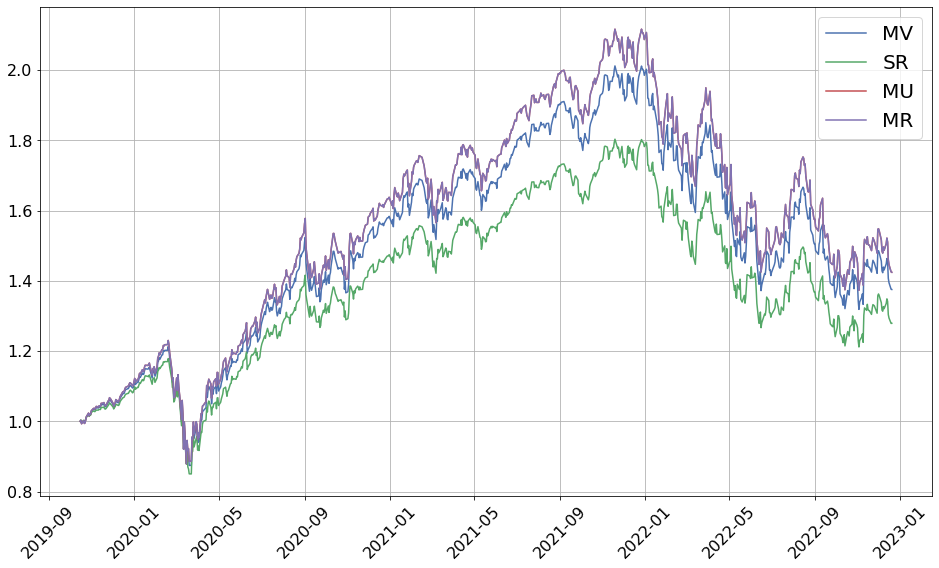

In [645]:
plt.figure(figsize = (16,9))

plt.plot(dataset_test.index,ret_test_MV/ret_test_MV[0],label = "MV")
plt.plot(dataset_test.index,ret_test_SR/ret_test_SR[0],label = "SR")
plt.plot(dataset_test.index,ret_test_MU/ret_test_MU[0],label = "MU")
plt.plot(dataset_test.index,ret_test_MR/ret_test_MR[0],label = "MR")
plt.legend(fontsize = 20)
plt.xticks(fontsize = 16,rotation = 45);
plt.yticks(fontsize = 16);
plt.grid()